# Librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import cv2
import os, fnmatch
from tqdm.auto import tqdm
import seaborn as sns

# Para trabajar con ResNet
from torchvision.models import resnet50
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
from torchvision import datasets
import torchvision.transforms as transforms
import copy
import random
from   torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import gc
import shutil

# Métricas
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

#Para manipular .rar
import zipfile

# Geopandas
import geopandas as gpd
import networkx as nx
import collections

from tqdm import tqdm
from tqdm.notebook import tqdm
from collections import defaultdict

plt.style.use('ggplot')

In [ ]:
# Open street maps
!pip install -q osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.2/107.2 kB 1.2 MB/s eta 0:00:00


In [ ]:
import osmnx as ox

In [ ]:
!pip install -q torch_geometric

In [ ]:
from torch_geometric.utils.convert import from_networkx, to_networkx
from torch_geometric.utils import to_dense_adj
from torch_geometric.data import Data
from torch_geometric.transforms import FeaturePropagation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.5 MB/s eta 0:00:00


In [ ]:
!pip install gdown

In [ ]:
import gdown

# ID del archivo de Google Drive
file_id = '1AvxGaBQj02E_ZWWTt3_ATY0uK4VMLH9u'
# URL de descarga directa
url = f'https://drive.google.com/uc?id={file_id}'
# Nombre del archivo que deseas guardar
output = 'imagenes_stgo.zip'  # Cambia la extensión según el archivo

gdown.download(url, output, quiet=False, fuzzy=True)


Downloading...
From (original): https://drive.google.com/uc?id=1AvxGaBQj02E_ZWWTt3_ATY0uK4VMLH9u
From (redirected): https://drive.google.com/uc?id=1AvxGaBQj02E_ZWWTt3_ATY0uK4VMLH9u&confirm=t&uuid=abecfdbb-b24e-4bea-b556-faeea60f663e
To: /content/imagenes_stgo.zip
100%|██████████| 4.07G/4.07G [00:52<00:00, 77.4MB/s]


'imagenes_stgo.zip'

# Fotografías de Santiago

In [ ]:
dir_rar = "/content/imagenes_stgo.zip"

Nombre foto 1: imagenes_stgo/-33.36865132,-70.704327184.jpg


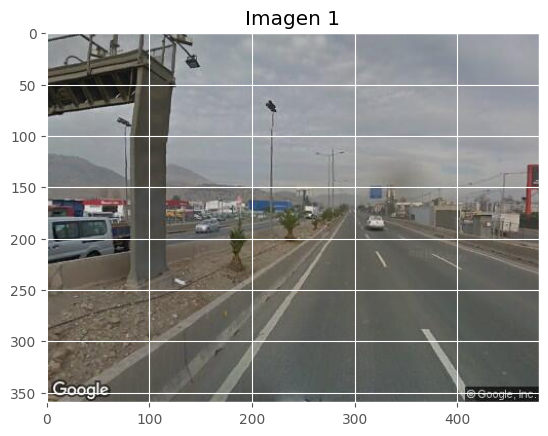

In [ ]:
# Definir coordienada latitud y longitud
ejemplo = "imagenes_stgo/-33.36865132,-70.704327184.jpg"
try:
    with zipfile.ZipFile(dir_rar, 'r') as archivo:
        archivo_contents = archivo.namelist() #almacena lista con todos los nombres de las imágenes
        if ejemplo in archivo_contents:
            archivo.extract(ejemplo)
            print(f"Nombre foto 1: {ejemplo}")
        else:
            print(f"Error")

except FileNotFoundError as e:
    print(f"Error: {e}")

img1 = cv2.imread(f'/content/{ejemplo}')
I1 =cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) # Formato imread a formato plt

plt.imshow(I1)
plt.title("Imagen 1")

plt.show()

In [ ]:
df_fotos_rar = pd.DataFrame({"nombre_foto":archivo_contents})
print(len(df_fotos_rar))

df_fotos_rar.head()

125921


,nombre_foto
0,imagenes_stgo/
1,"imagenes_stgo/-33.323944,-70.51263428391167.jpg"
2,"imagenes_stgo/-33.323944,-70.5127291.jpg"
3,"imagenes_stgo/-33.323944,-70.51298714285714.jpg"
4,"imagenes_stgo/-33.323944,-70.513436104.jpg"


In [ ]:
df_fotos = df_fotos_rar.iloc[1:].reset_index(drop=True)
df_fotos_filtro = df_fotos[df_fotos.nombre_foto.str.contains(".jpg")].reset_index(drop=True)

print(len(df_fotos))
df_fotos.head()

125920


,nombre_foto
0,"imagenes_stgo/-33.323944,-70.51263428391167.jpg"
1,"imagenes_stgo/-33.323944,-70.5127291.jpg"
2,"imagenes_stgo/-33.323944,-70.51298714285714.jpg"
3,"imagenes_stgo/-33.323944,-70.513436104.jpg"
4,"imagenes_stgo/-33.323944,-70.51379769565217.jpg"



En la siguiente función se crearán las columnas latitud y longitud que será necesario para seleccionar puntos en la comuna

In [ ]:
def lat_lon(x):
  x = str(x)
  x = x.replace("imagenes_stgo/","")
  x = x.replace(".jpg","")
  latitud , longitud = x.split(",")
  if " " in longitud:
    longitud , _ = longitud.split(" ")
  return latitud, longitud

In [ ]:
latitud_list = []
longitud_list = []
for i in df_fotos_filtro.nombre_foto.tolist():
  a, b = lat_lon(i)
  latitud_list.append(a)
  longitud_list.append(b)

In [ ]:
df_fotos_filtro["latitud"] = latitud_list
df_fotos_filtro["longitud"] = longitud_list

df_fotos_filtro["latitud"] = df_fotos_filtro["latitud"].astype(float)
df_fotos_filtro["longitud"] = df_fotos_filtro["longitud"].astype(float)

In [ ]:
df_fotos_filtro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125380 entries, 0 to 125379
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   nombre_foto  125380 non-null  object 
 1   latitud      125380 non-null  float64
 2   longitud     125380 non-null  float64
dtypes: float64(2), object(1)
memory usage: 2.9+ MB


In [ ]:
df_fotos_filtro

,nombre_foto,latitud,longitud
0,"imagenes_stgo/-33.323944,-70.51263428391167.jpg",-33.323944,-70.512634
1,"imagenes_stgo/-33.323944,-70.5127291.jpg",-33.323944,-70.512729
2,"imagenes_stgo/-33.323944,-70.51298714285714.jpg",-33.323944,-70.512987
3,"imagenes_stgo/-33.323944,-70.513436104.jpg",-33.323944,-70.513436
4,"imagenes_stgo/-33.323944,-70.51379769565217.jpg",-33.323944,-70.513798
...,...,...,...
125375,"imagenes_stgo/-33.67884090851735,-70.680595141...",-33.678841,-70.680595
125376,"imagenes_stgo/-33.67884090851735,-70.699120236...",-33.678841,-70.699120
125377,"imagenes_stgo/-33.67884090851735,-70.706530274...",-33.678841,-70.706530
125378,"imagenes_stgo/-33.67884090851735,-70.717645331...",-33.678841,-70.717645


A continuación, se crea la columna geometry.

In [ ]:
allpoints = gpd.GeoDataFrame(df_fotos_filtro, geometry= gpd.points_from_xy(df_fotos_filtro["longitud"], df_fotos_filtro["latitud"]))

allpoints

,nombre_foto,latitud,longitud,geometry
0,"imagenes_stgo/-33.323944,-70.51263428391167.jpg",-33.323944,-70.512634,POINT (-70.51263 -33.32394)
1,"imagenes_stgo/-33.323944,-70.5127291.jpg",-33.323944,-70.512729,POINT (-70.51273 -33.32394)
2,"imagenes_stgo/-33.323944,-70.51298714285714.jpg",-33.323944,-70.512987,POINT (-70.51299 -33.32394)
3,"imagenes_stgo/-33.323944,-70.513436104.jpg",-33.323944,-70.513436,POINT (-70.51344 -33.32394)
4,"imagenes_stgo/-33.323944,-70.51379769565217.jpg",-33.323944,-70.513798,POINT (-70.51380 -33.32394)
...,...,...,...,...
125375,"imagenes_stgo/-33.67884090851735,-70.680595141...",-33.678841,-70.680595,POINT (-70.68060 -33.67884)
125376,"imagenes_stgo/-33.67884090851735,-70.699120236...",-33.678841,-70.699120,POINT (-70.69912 -33.67884)
125377,"imagenes_stgo/-33.67884090851735,-70.706530274...",-33.678841,-70.706530,POINT (-70.70653 -33.67884)
125378,"imagenes_stgo/-33.67884090851735,-70.717645331...",-33.678841,-70.717645,POINT (-70.71765 -33.67884)


# Cargar datos de delitos

In [ ]:
!gdown https://drive.google.com/uc?id=1Bki6zuVe3d32YAHS0FGjO4SlNHP7WzKl

Downloading...
From (original): https://drive.google.com/uc?id=1Bki6zuVe3d32YAHS0FGjO4SlNHP7WzKl
From (redirected): https://drive.google.com/uc?id=1Bki6zuVe3d32YAHS0FGjO4SlNHP7WzKl&confirm=t&uuid=96f8d5c2-02be-4031-b928-75bbe35857d1
To: /content/delitos_limpio.csv
100% 879M/879M [00:09<00:00, 93.2MB/s]


In [ ]:
import pandas as pd
import geopandas as gpd

csv_file_path = 'delitos_limpio.csv'
df = pd.read_csv(csv_file_path)

gdf_delitos = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['x'], df['y']))

gdf_delitos

,index,x,y,parte_id,fecha,hora,rango,clasificacion_parte,source,source_glosa,...,delito,riesgo_situacional,descripcion_situacional,denuncia_formal,denuncia_informa,comuna,id_comuna,barrio,id_barrio,geometry
0,NaN,-70.946931,-33.458234,394474,2015-07-31,08:30:00,8:00-11:59,Denuncia,caso_policial,Caso policial,...,Robo vehículos motorizados,NaN,NaN,NaN,NaN,Pudahuel,13124,NaN,NaN,POINT (-70.94693 -33.45823)
1,NaN,-70.937412,-33.475248,12796554,2021-11-05,19:40:00,16:00-19:59,Denuncia,caso_policial,Caso policial,...,Hallazgo de vehículo,NaN,NaN,NaN,NaN,Pudahuel,13124,NaN,NaN,POINT (-70.93741 -33.47525)
2,NaN,-70.937002,-33.456887,148692,2016-05-02,11:40:00,8:00-11:59,Denuncia,caso_policial,Caso policial,...,Lesiones leves,NaN,NaN,NaN,NaN,Pudahuel,13124,NaN,NaN,POINT (-70.93700 -33.45689)
3,NaN,-70.937002,-33.456887,5022545,2017-08-05,06:30:00,4:00-7:59,Denuncia,caso_policial,Caso policial,...,Daños,NaN,NaN,NaN,NaN,Pudahuel,13124,NaN,NaN,POINT (-70.93700 -33.45689)
4,NaN,-70.936990,-33.475305,13108530,2022-01-07,22:05:00,20:00-23:59,Denuncia,caso_policial,Caso policial,...,Robo con violencia o intimidación,NaN,NaN,NaN,NaN,Pudahuel,13124,NaN,NaN,POINT (-70.93699 -33.47530)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4418603,NaN,-70.248616,-33.357852,12586668,2021-08-13,10:00:00,8:00-11:59,Denuncia,caso_policial,Caso policial,...,Robo en lugar habitado,NaN,NaN,NaN,NaN,Lo Barnechea,13115,NaN,NaN,POINT (-70.24862 -33.35785)
4418604,NaN,-70.248301,-33.352921,8866623,2019-09-18,03:40:00,0:00-3:59,Detención,caso_policial,Caso policial,...,Lesiones leves,NaN,NaN,NaN,NaN,Lo Barnechea,13115,NaN,NaN,POINT (-70.24830 -33.35292)
4418605,NaN,-70.248213,-33.353317,8866628,2019-09-21,18:35:00,16:00-19:59,Detención,caso_policial,Caso policial,...,Robo en lugar no habitado,NaN,NaN,NaN,NaN,Lo Barnechea,13115,NaN,NaN,POINT (-70.24821 -33.35332)
4418606,NaN,-70.212959,-33.249627,9829539,2020-01-11,10:00:00,8:00-11:59,Denuncia,caso_policial,Caso policial,...,Robo en lugar no habitado,NaN,NaN,NaN,NaN,Lo Barnechea,13115,NaN,NaN,POINT (-70.21296 -33.24963)


In [ ]:
delitos_providencia = gdf_delitos[gdf_delitos['comuna'] == 'Providencia'].reset_index(drop=True)
delitos_providencia

,index,x,y,parte_id,fecha,hora,rango,clasificacion_parte,source,source_glosa,...,delito,riesgo_situacional,descripcion_situacional,denuncia_formal,denuncia_informa,comuna,id_comuna,barrio,id_barrio,geometry
0,NaN,-70.636265,-33.430640,5733886,2017-06-26,00:20:00,0:00-3:59,Denuncia,caso_policial,Caso policial,...,Ebriedad,NaN,NaN,NaN,NaN,Providencia,13123,NaN,NaN,POINT (-70.63627 -33.43064)
1,NaN,-70.636265,-33.430640,349882,2015-02-12,02:10:00,0:00-3:59,Detención,caso_policial,Caso policial,...,Orden de aprehensión,NaN,NaN,NaN,NaN,Providencia,13123,NaN,NaN,POINT (-70.63627 -33.43064)
2,NaN,-70.636265,-33.430640,349884,2015-02-21,01:20:00,0:00-3:59,Detención,caso_policial,Caso policial,...,Orden de aprehensión,NaN,NaN,NaN,NaN,Providencia,13123,NaN,NaN,POINT (-70.63627 -33.43064)
3,NaN,-70.636265,-33.430640,349890,2015-06-23,09:05:00,8:00-11:59,Denuncia,caso_policial,Caso policial,...,Daños,NaN,NaN,NaN,NaN,Providencia,13123,NaN,NaN,POINT (-70.63627 -33.43064)
4,NaN,-70.636265,-33.430640,349891,2015-03-04,02:45:00,0:00-3:59,Denuncia,caso_policial,Caso policial,...,Robo con violencia o intimidación,NaN,NaN,NaN,NaN,Providencia,13123,NaN,NaN,POINT (-70.63627 -33.43064)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243908,NaN,-70.582910,-33.433639,3343563,2013-04-12,20:40:00,20:00-23:59,Denuncia,caso_policial,Caso policial,...,Robo por sorpresa,NaN,NaN,NaN,NaN,Providencia,13123,NaN,NaN,POINT (-70.58291 -33.43364)
243909,NaN,-70.582910,-33.433639,3735312,2013-01-11,10:30:00,8:00-11:59,Denuncia,caso_policial,Caso policial,...,Robo vehículos motorizados,NaN,NaN,NaN,NaN,Providencia,13123,NaN,NaN,POINT (-70.58291 -33.43364)
243910,NaN,-70.582810,-33.434293,180049,2013-01-23,19:30:00,16:00-19:59,Denuncia,caso_policial,Caso policial,...,Robo frustrado,NaN,NaN,NaN,NaN,Providencia,13123,NaN,NaN,POINT (-70.58281 -33.43429)
243911,NaN,-70.582562,-33.433997,450812,2013-01-28,18:43:00,16:00-19:59,Denuncia,caso_policial,Caso policial,...,Amenaza (incivilidades),NaN,NaN,NaN,NaN,Providencia,13123,NaN,NaN,POINT (-70.58256 -33.43400)


# Crear de grafo con Open Street Map

En este caso, se trabaja con la comuna de Providencia. A continuación, se presenta el mapa de la comuna, incluyendo los nodos.

<ipython-input-22-fe9749a50f88>:1: FutureWarning: The `utils.config` function is deprecated and will be removed in the v2.0.0 release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  ox.config(use_cache=True, log_console=True)


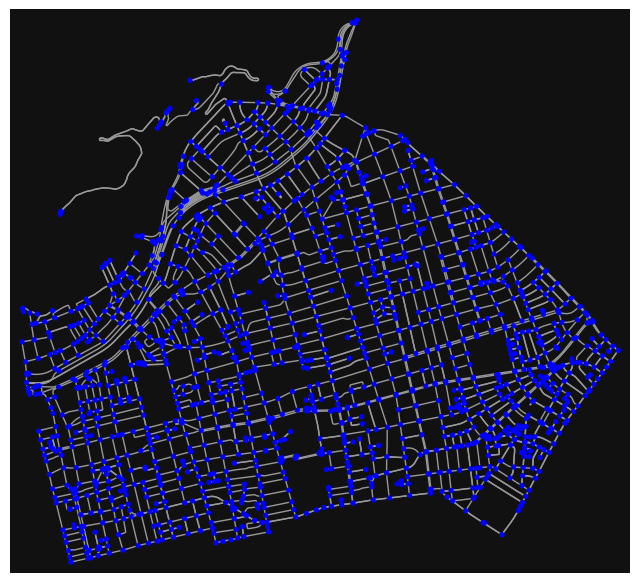

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
ox.config(use_cache=True, log_console=True)
place = 'Providencia, Chile'
cf = '["highway"~"primary"]'
G = ox.graph_from_place(place, network_type='drive')
ox.plot_graph(G, node_color="blue", node_size=15)

In [ ]:
G = ox.graph_from_place('Providencia, Chile', network_type='drive')
gdf_nodes, gdf_edges = ox.utils_graph.graph_to_gdfs(G)

<ipython-input-23-ec5b887ff23a>:2: FutureWarning: The `graph_to_gdfs` function has moved to the `convert` module. Calling `utils_graph.graph_to_gdfs` is deprecated and will be removed in the v2.0.0 release. Call it via `convert.graph_to_gdfs` instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  gdf_nodes, gdf_edges = ox.utils_graph.graph_to_gdfs(G)


In [ ]:
print(gdf_nodes.shape)
gdf_nodes.head()

(1614, 6)


,y,x,street_count,highway,ref,geometry
osmid,,,,,,
388703,-33.446710,-70.627434,4,NaN,NaN,POINT (-70.62743 -33.44671)
388705,-33.447411,-70.632154,4,traffic_signals,NaN,POINT (-70.63215 -33.44741)
13876993,-33.441482,-70.625170,3,NaN,NaN,POINT (-70.62517 -33.44148)
13876995,-33.439819,-70.618300,4,NaN,NaN,POINT (-70.61830 -33.43982)
13876998,-33.438432,-70.607347,4,traffic_signals,NaN,POINT (-70.60735 -33.43843)


# Encontrar imágenes más cercanas

Ahora se encontrarán las imágenes más cercanas a cada nodo. Este proceso toma 30 minutos, aproximadamente.

In [ ]:
allpoints['nearest_node'] = allpoints.geometry.apply(lambda point: ox.distance.nearest_nodes(G, point.x, point.y) if not point.is_empty else None)

allpoints.nearest_node.value_counts()

nearest_node
224509015     44977
207718535     21140
265684111      8280
2459726703     7870
277347165      7502
              ...  
148849428         1
247290280         1
133349866         1
5329476831        1
285889194         1
Name: count, Length: 1359, dtype: int64

Ahora se asignará a cada nodo el nombre de la imagen.

In [ ]:
for index, row in allpoints.iterrows():
    node_id = row['nearest_node']
    # Se asignan las variables percetuales a los nodos
    G.nodes[node_id]['nombre_foto'] = row['nombre_foto']

In [ ]:
gdf_nodes_imputados, gdf_edges_imputados = ox.utils_graph.graph_to_gdfs(G)

<ipython-input-28-13c064797b09>:1: FutureWarning: The `graph_to_gdfs` function has moved to the `convert` module. Calling `utils_graph.graph_to_gdfs` is deprecated and will be removed in the v2.0.0 release. Call it via `convert.graph_to_gdfs` instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  gdf_nodes_imputados, gdf_edges_imputados = ox.utils_graph.graph_to_gdfs(G)


In [ ]:
nodos_final = gdf_nodes_imputados.reset_index()

Nodos sin imagen

In [ ]:
print(len(nodos_final))
nodos_final.isnull().sum()

1614


osmid              0
y                  0
x                  0
street_count       0
nombre_foto      255
highway         1356
ref             1610
geometry           0
dtype: int64

In [ ]:
nodos_final

,osmid,y,x,street_count,nombre_foto,highway,ref,geometry
0,388703,-33.446710,-70.627434,4,"imagenes_stgo/-33.44688615827338,-70.627275086...",NaN,NaN,POINT (-70.62743 -33.44671)
1,388705,-33.447411,-70.632154,4,"imagenes_stgo/-33.481379867132866,-70.79805571...",traffic_signals,NaN,POINT (-70.63215 -33.44741)
2,13876993,-33.441482,-70.625170,3,"imagenes_stgo/-33.44186860567823,-70.625019858...",NaN,NaN,POINT (-70.62517 -33.44148)
3,13876995,-33.439819,-70.618300,4,"imagenes_stgo/-33.440183032,-70.618072696.jpg",NaN,NaN,POINT (-70.61830 -33.43982)
4,13876998,-33.438432,-70.607347,4,NaN,traffic_signals,NaN,POINT (-70.60735 -33.43843)
...,...,...,...,...,...,...,...,...
1609,11560166843,-33.427521,-70.628310,3,NaN,NaN,NaN,POINT (-70.62831 -33.42752)
1610,11560166844,-33.427562,-70.628415,1,NaN,NaN,NaN,POINT (-70.62841 -33.42756)
1611,11600885365,-33.428122,-70.613084,1,"imagenes_stgo/-33.428255592356685,-70.61316223...",NaN,NaN,POINT (-70.61308 -33.42812)
1612,11646876257,-33.434531,-70.616906,1,"imagenes_stgo/-33.435130056782334,-70.61760982...",NaN,NaN,POINT (-70.61691 -33.43453)


In [ ]:
aristas_final = gdf_edges_imputados.reset_index()

# Guardar archivos

In [ ]:
nodos_final.to_csv("nodos_final_providencia_total.csv",index=False)
aristas_final.to_csv("aristas_final_providencia_total.csv",index=False)

# Cargar archivos

In [ ]:
df_nodos = pd.read_csv("nodos_final_providencia_total.csv")

print(len(df_nodos))
df_nodos.head()

1614


,osmid,y,x,street_count,nombre_foto,highway,ref,geometry
0,388703,-33.446710,-70.627434,4,"imagenes_stgo/-33.44688615827338,-70.627275086...",NaN,NaN,POINT (-70.6274342 -33.4467104)
1,388705,-33.447411,-70.632154,4,"imagenes_stgo/-33.481379867132866,-70.79805571...",traffic_signals,NaN,POINT (-70.6321538 -33.4474114)
2,13876993,-33.441482,-70.625170,3,"imagenes_stgo/-33.44186860567823,-70.625019858...",NaN,NaN,POINT (-70.6251697 -33.441482)
3,13876995,-33.439819,-70.618300,4,"imagenes_stgo/-33.440183032,-70.618072696.jpg",NaN,NaN,POINT (-70.6183001 -33.439819)
4,13876998,-33.438432,-70.607347,4,NaN,traffic_signals,NaN,POINT (-70.6073472 -33.4384323)


# Visualizar imágenes en el mapa

Nombre foto 1: imagenes_stgo/-33.44688615827338,-70.62727508695653.jpg


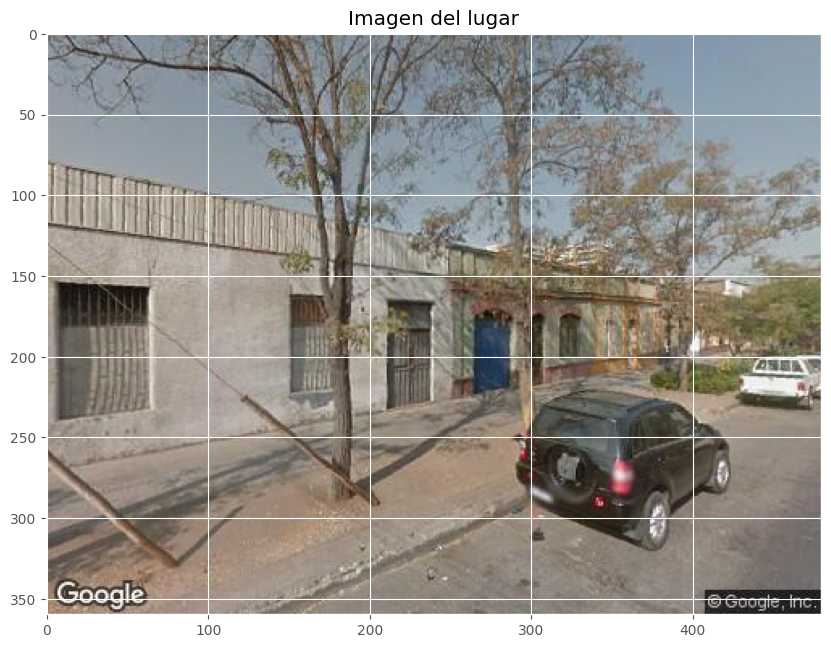

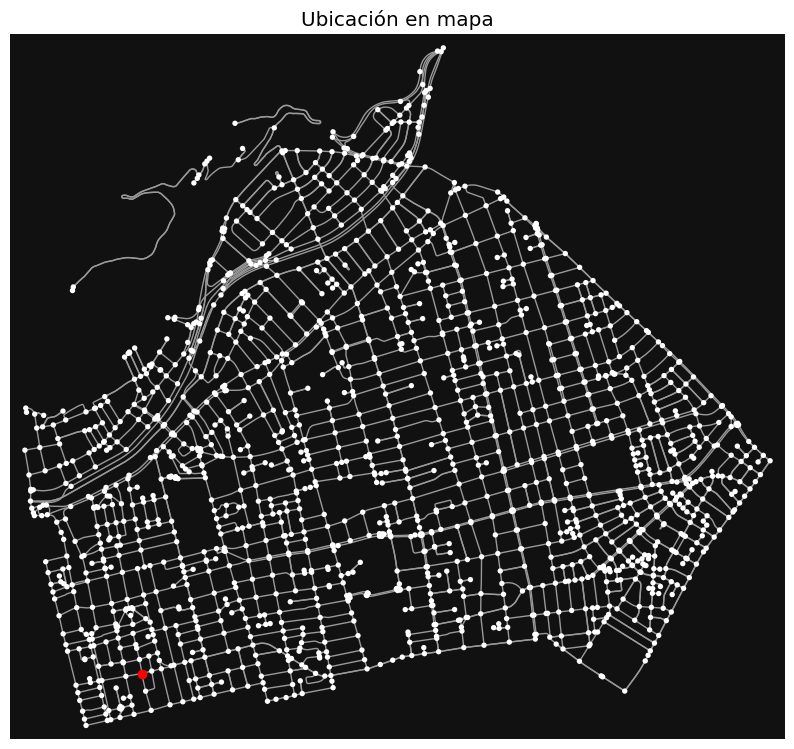

In [ ]:
##Definir coordinada latitud y longitud
ejemplo = df_nodos.nombre_foto.tolist()[0]
try:
    with zipfile.ZipFile(dir_rar, 'r') as archivo:
        archivo_contents = archivo.namelist() #almacena lista con todos los nombres de las imágenes
        if ejemplo in archivo_contents:
            archivo.extract(ejemplo)
            print(f"Nombre foto 1: {ejemplo}")
        else:
            print(f"Error")

except FileNotFoundError as e:
    print(f"Error: {e}")

plt.figure(figsize=(10,10))
img1 = cv2.imread(f'/content/{ejemplo}')
I1 =cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

#fig, ax = plt.subplots(2,figsize=(12,16))

plt.imshow(I1)
plt.title(f"Imagen del lugar")

plt.show()

place = 'Providencia, Chile'
cf = '["highway"~"primary"]'
G = ox.graph_from_place(place, network_type='drive')
fig, ax = ox.plot_graph(G, show=False, close = False, node_size=15, figsize=(10,10))
lon = df_nodos.x.tolist()[0]
lat = df_nodos.y.tolist()[0]
ax.set_title("Ubicación en mapa")
ax.plot(lon,lat,c='red',marker='o')

A continuación, se marcan en rojo todos los nodos que tienen asociada una imagen.

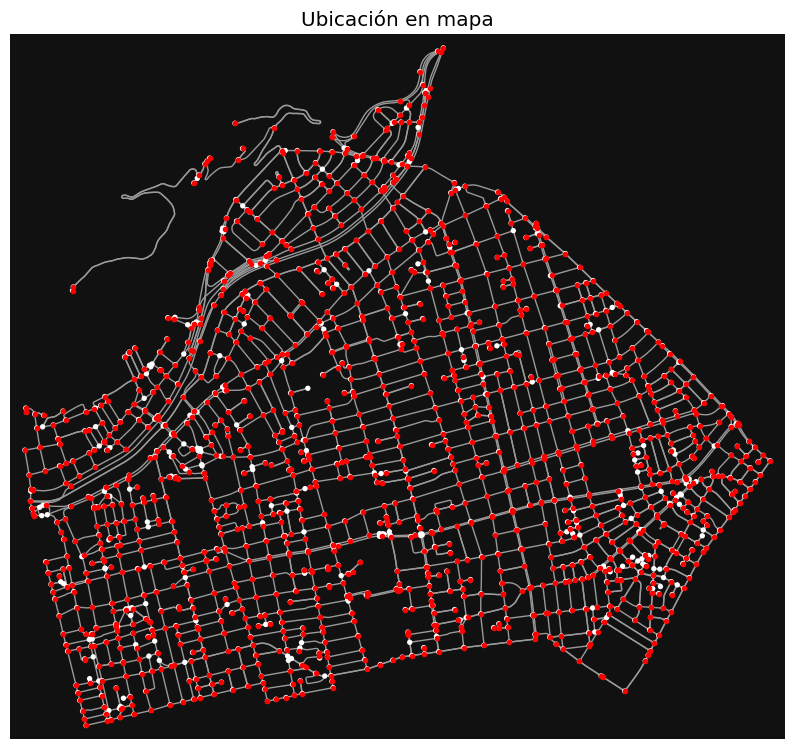

In [ ]:
place = 'Providencia, Chile'
cf = '["highway"~"primary"]'
G = ox.graph_from_place(place, network_type='drive')
fig, ax = ox.plot_graph(G, show=False, close = False, figsize=(10,10))

for i in range(len(df_nodos.x.tolist())):
  if len(str(df_nodos.nombre_foto[i])) > 3: #para considerar nan
    lon = df_nodos.x.tolist()[i]
    lat = df_nodos.y.tolist()[i]
    ax.set_title("Ubicación en mapa")
    ax.plot(lon,lat,c='red',marker='.')